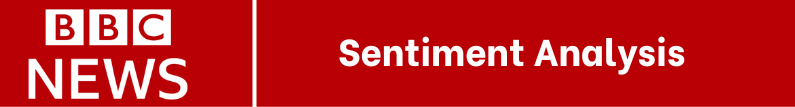

In [2]:
import os,re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim
from summarytools import dfSummary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import HashingVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
folder_path = "C:/Users/ab/OneDrive/Desktop/DS and Eng Methods Fall 24 (Sem 1)/dataset"
csv_files =[]
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        csv_files.append(os.path.join(folder_path, file))

In [4]:
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

In [5]:
df.head()

,title,pubDate,link,description,broadcast,title_predicted_sentiment,description_predicted_sentiment
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,BBC,Negative,Negative
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",BBC,Negative,Negative
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,BBC,Negative,Negative
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,BBC,Positive,Negative
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,BBC,Negative,Positive


In [6]:
df.count()

title                              39685
pubDate                            39685
link                               39685
description                        39685
broadcast                          39685
title_predicted_sentiment          39685
description_predicted_sentiment    39685
dtype: int64

In [7]:
df.describe()

,title,pubDate,link,description,broadcast,title_predicted_sentiment,description_predicted_sentiment
count,39685,39685,39685,39685,39685,39685,39685
unique,38068,38615,36316,37204,5,3,3
top,Election poll tracker: How do the parties comp...,"Fri, 11 Oct 2024 04:00:43 GMT",https://www.bbc.co.uk/news/business-61634959?a...,How closely have you been paying attention to ...,BBC,Negative,Negative
freq,33,7,61,80,39135,15446,15177


In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 39685  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 7      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                                 │     0 │         0 │                      9.7 │              386466 │  │
│ │ pubDate                               │     0 │         0 │                        6 │              238110 │  │
│ │ link                                  │     0 │         0 │                        1 │               39685 │  │
│ │ description                           │     0 │         0 │                       19 │              735992 │  │
│ │ broadcast                             │     0 │         0 │                        1 │               40168 │  │
│ │ title_predicted_sentiment             │     0 │         0 │                        1 │               39685 │  │
│ │ description_predicted_sentiment       │     0 │         0 │                        1 │               39685 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Inital Data Summary and Explorations

In [10]:
df_wc = df.copy()
df_wc['description_wordcount'] = df['description'].apply(lambda x:len(str(x).split(" ")))
df_wc['title_wordcount'] = df['title'].apply(lambda x:len(str(x).split(" ")))

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(df_wc[['title','title_wordcount','description','description_wordcount']] \
        .rename(columns={'description_wordcount':'wordcount','title_wordcount':'wordcount'}) \
        .head())

,title,wordcount,description,wordcount
0,Ukraine: Angry Zelensky vows to punish Russian atrocities,8,The Ukrainian president says the country will not forgive or forget those who murder its civilians.,16
1,War in Ukraine: Taking cover in a town under attack,10,"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.",18
2,Ukraine war 'catastrophic for global food',6,One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.,17
3,Manchester Arena bombing: Saffie Roussos's parents on hearing the truth,10,The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.,16
4,Ukraine conflict: Oil price soars to highest level since 2008,10,Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.,16


In [11]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,title[object],1. Election poll tracker: How do 2. Ukraine war in maps: Tracking 3. What is the UK inflation rate 4. Newscast5. How many Ukrainians have fled 6. UK inflation rate calculator: 7. Hamas hostages: Who are the pe8. What is a recession and how co9. What is the UK inflation rate 10. Covid-19 in the UK: How many c11. other,"33 (0.1%)32 (0.1%)26 (0.1%)24 (0.1%)18 (0.0%)17 (0.0%)16 (0.0%)16 (0.0%)14 (0.0%)13 (0.0%)39,476 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,pubDate[object],"1. Fri, 11 Oct 2024 04:00:43 GMT2. Tue, 23 Apr 2024 00:00:00 GMT3. Fri, 03 May 2024 00:00:00 GMT4. Wed, 24 Apr 2024 00:00:00 GMT5. Mon, 03 Jul 2023 13:01:34 GMT6. Fri, 11 Oct 2024 14:00:58 GMT7. Fri, 11 Oct 2024 13:00:57 GMT8. Thu, 02 May 2024 00:00:00 GMT9. Fri, 11 Oct 2024 10:00:50 GMT10. Fri, 11 Oct 2024 16:00:02 GMT11. other","7 (0.0%)5 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)39,641 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,link[object],1. https://www.bbc.co.uk/news/bus2. https://www.bbc.co.uk/news/bus3. https://www.bbc.co.uk/news/wor4. https://www.bbc.co.uk/news/uk-5. https://www.bbc.co.uk/news/bus6. https://www.bbc.co.uk/news/wor7. https://www.bbc.co.uk/news/bus8. https://www.bbc.co.uk/news/bus9. https://www.bbc.co.uk/news/wor10. https://www.bbc.co.uk/news/uk-11. other,

# WordCloud

(-0.5, 1499.5, 699.5, -0.5)

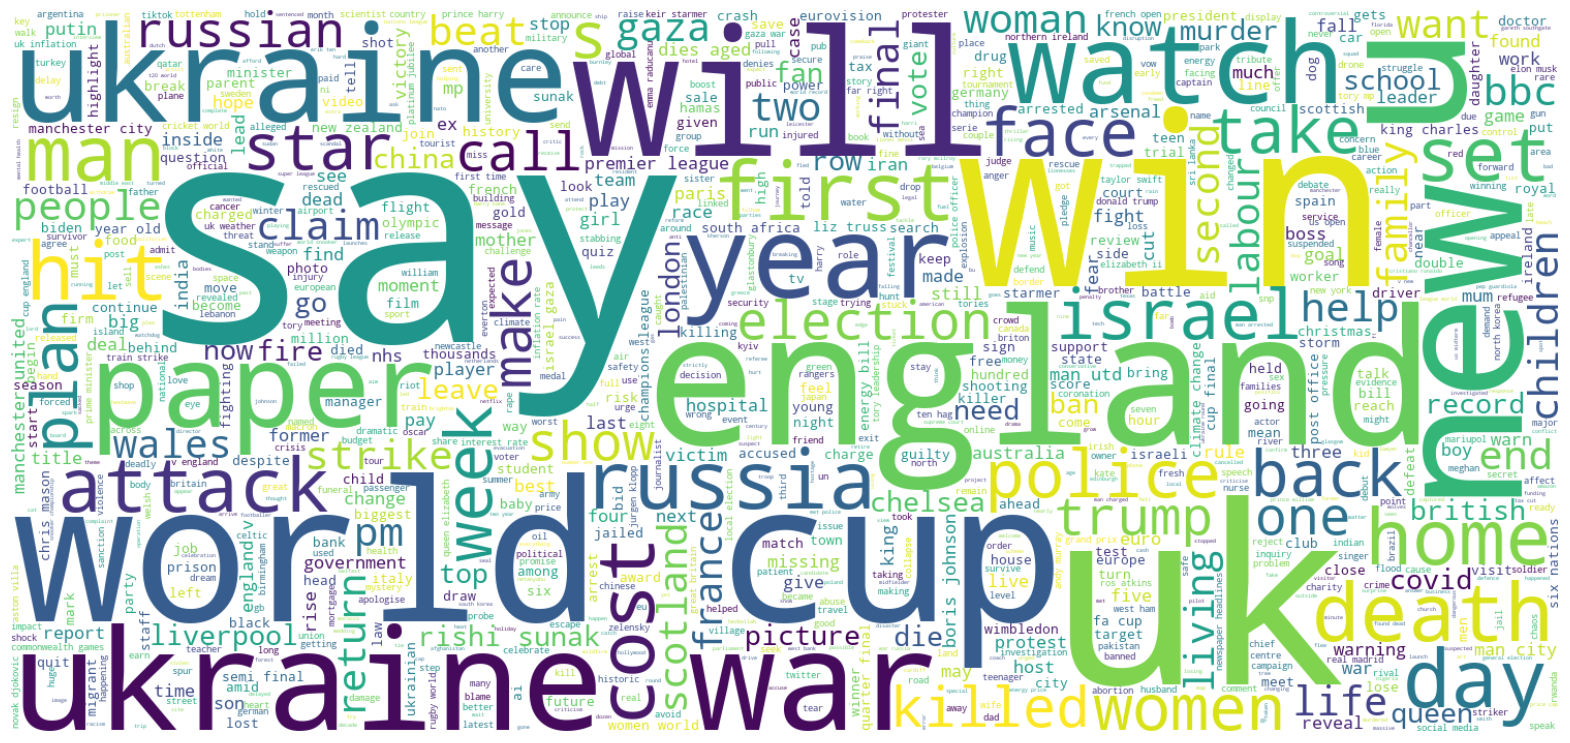

In [13]:
df["title"] = df["title"].fillna(value="")
title_words = " ".join(df['title'].str.lower())
plt.figure(figsize=(20,20))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1000, max_font_size= 300,  width=1500, height=700)
wc.generate(title_words)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

(-0.5, 1499.5, 699.5, -0.5)

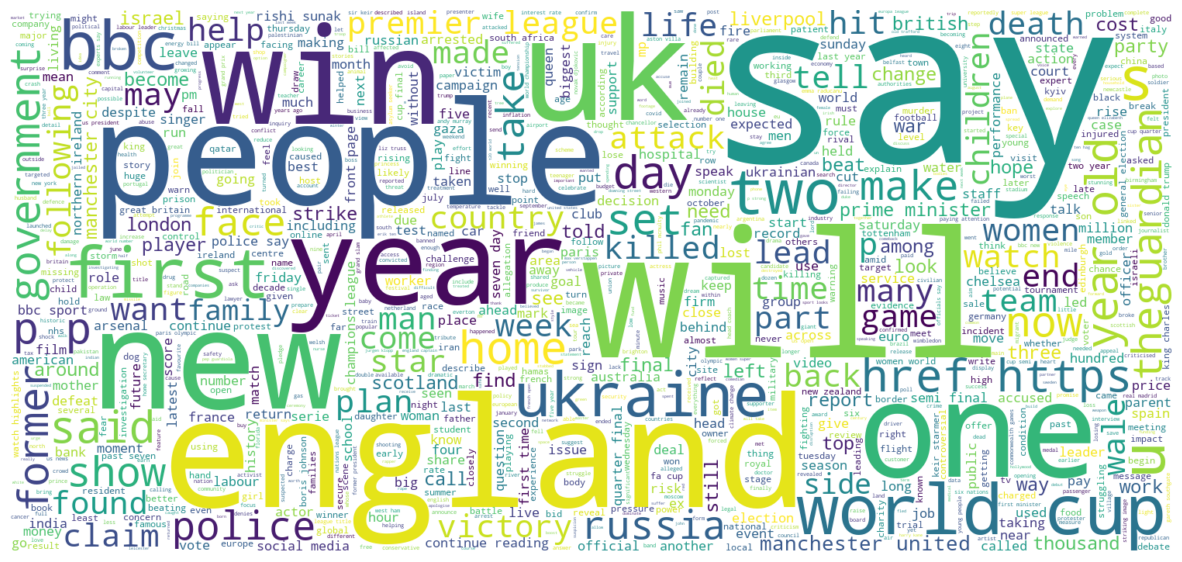

In [14]:
df["description"] = df["description"].fillna(value="")
description_words = " ".join(df['description'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=1000, max_font_size= 300,  width=1500, height=700)
wc.generate(description_words)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Pre-Processing Text 
- To clean and concise the textual data
- For further sentiment analysis

In [16]:
df_preprocessing = df.copy()

In [17]:
df_preprocessing['clean_title'] = df['title'].str.lower()
df_preprocessing['clean_desr'] = df['description'].str.lower()

In [18]:
df_preprocessing['clean_title'] = df_preprocessing['clean_title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df_preprocessing['clean_desr'] = df_preprocessing['clean_desr'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [19]:
#Stopwords removal
stop_words = set(stopwords.words('english'))
df_preprocessing['clean_title'] = df_preprocessing['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_preprocessing['clean_desr'] = df_preprocessing['clean_desr'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [20]:
# Tokenization - process of splitting text into individual words (tokens)
df_preprocessing['title_tokens'] = df_preprocessing['clean_title'].apply(word_tokenize)
df_preprocessing['descr_tokens'] = df_preprocessing['clean_desr'].apply(word_tokenize)

In [21]:
#Stemming -  Stemming trims the ends of words, while Lemmatization reduces words to their dictionary form
stemmer = PorterStemmer()
df_preprocessing['stemmed_text'] = df_preprocessing['title_tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))
df_preprocessing['stemmed_descr'] = df_preprocessing['descr_tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

In [22]:
# Lemmatization
lemmatizer = WordNetLemmatizer() 
df_preprocessing['title_lemma'] = df_preprocessing['title_tokens'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x]))
df_preprocessing['descr_lemma'] = df_preprocessing['descr_tokens'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [23]:
df_preprocessing[['title', 'title_tokens','stemmed_text','title_lemma']].head()

,title,title_tokens,stemmed_text,title_lemma
0,Ukraine: Angry Zelensky vows to punish Russian atrocities,"[ukraine, angry, zelensky, vows, punish, russian, atrocities]",ukrain angri zelenski vow punish russian atroc,ukraine angry zelensky vow punish russian atrocity
1,War in Ukraine: Taking cover in a town under attack,"[war, ukraine, taking, cover, town, attack]",war ukrain take cover town attack,war ukraine taking cover town attack
2,Ukraine war 'catastrophic for global food',"[ukraine, war, catastrophic, global, food]",ukrain war catastroph global food,ukraine war catastrophic global food
3,Manchester Arena bombing: Saffie Roussos's parents on hearing the truth,"[manchester, arena, bombing, saffie, roussoss, parents, hearing, truth]",manchest arena bomb saffi roussoss parent hear truth,manchester arena bombing saffie roussoss parent hearing truth
4,Ukraine conflict: Oil price soars to highest level since 2008,"[ukraine, conflict, oil, price, soars, highest, level, since]",ukrain conflict oil price soar highest level sinc,ukraine conflict oil price soar highest level since


In [24]:
df_preprocessing[['description','descr_tokens','stemmed_descr','descr_lemma']].head()

,description,descr_tokens,stemmed_descr,descr_lemma
0,The Ukrainian president says the country will not forgive or forget those who murder its civilians.,"[ukrainian, president, says, country, forgive, forget, murder, civilians]",ukrainian presid say countri forgiv forget murder civilian,ukrainian president say country forgive forget murder civilian
1,"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.","[jeremy, bowen, frontline, irpin, residents, came, russian, fire, trying, flee]",jeremi bowen frontlin irpin resid came russian fire tri flee,jeremy bowen frontline irpin resident came russian fire trying flee
2,One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.,"[one, worlds, biggest, fertiliser, firms, says, conflict, could, deliver, shock, food, supplies]",one world biggest fertilis firm say conflict could deliv shock food suppli,one world biggest fertiliser firm say conflict could deliver shock food supply
3,The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.,"[parents, manchester, arena, bombings, youngest, victim, speak, life, since, died]",parent manchest arena bomb youngest victim speak life sinc die,parent manchester arena bombing youngest victim speak life since died
4,Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.,"[consumers, feeling, impact, higher, energy, costs, fuel, prices, household, bills, jump]",consum feel impact higher energi cost fuel price household bill jump,consumer feeling impact higher energy cost fuel price household bill jump


# Sentiment Analysis via - TextBlob

In [26]:
from textblob import TextBlob
df['title_polarity_textblob'] = df_preprocessing['title_lemma'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['title_sentiment_vader'] = df_preprocessing['title_lemma'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [27]:
from textblob import TextBlob
df['desc_polarity_textblob'] = df_preprocessing['descr_lemma'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['desc_subjectivity_textblob'] = df_preprocessing['descr_lemma'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [28]:
#Updated the boundary to be tighter from 0 -> 0.01
def sentiment_category_textblob(polarity):
        if polarity >= 0.01:
            return "Positive"
        elif polarity <= -0.01:
            return "Negative"
        else:
            return "Neutral"

In [29]:
df['title_sentiment_category_textblob'] = df['title_polarity_textblob'].apply(sentiment_category_textblob)
df['description_sentiment_category_textblob'] = df['desc_polarity_textblob'].apply(sentiment_category_textblob)

In [30]:
df[['title', 'title_polarity_textblob', 'title_sentiment_category_textblob', 'description', 'desc_polarity_textblob', 'description_sentiment_category_textblob']].head()

,title,title_polarity_textblob,title_sentiment_category_textblob,description,desc_polarity_textblob,description_sentiment_category_textblob
0,Ukraine: Angry Zelensky vows to punish Russian atrocities,-0.25,Negative,The Ukrainian president says the country will not forgive or forget those who murder its civilians.,0.000,Neutral
1,War in Ukraine: Taking cover in a town under attack,0.00,Neutral,"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.",0.000,Neutral
2,Ukraine war 'catastrophic for global food',0.00,Neutral,One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.,-0.200,Negative
3,Manchester Arena bombing: Saffie Roussos's parents on hearing the truth,0.00,Neutral,The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.,-0.075,Negative
4,Ukraine conflict: Oil price soars to highest level since 2008,0.00,Neutral,Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.,0.250,Positive


In [31]:
# Count the sentiment distribution for title sentiment
title_sentiment_summary = df['title_sentiment_category_textblob'].value_counts()

# Count the sentiment distribution for description sentiment
description_sentiment_summary = df['description_sentiment_category_textblob'].value_counts()

# Display the summaries
print("Title Sentiment Summary:")
print(title_sentiment_summary)

print("\nDescription Sentiment Summary:")
print(description_sentiment_summary)

Title Sentiment Summary:
title_sentiment_category_textblob
Neutral     23665
Positive     9127
Negative     6893
Name: count, dtype: int64

Description Sentiment Summary:
description_sentiment_category_textblob
Neutral     17339
Positive    13972
Negative     8374
Name: count, dtype: int64


In [32]:
# Calculate sentiment percentages for title
title_sentiment_percentage = df['title_sentiment_category_textblob'].value_counts(normalize=True) * 100

# Calculate sentiment percentages for description
description_sentiment_percentage = df['description_sentiment_category_textblob'].value_counts(normalize=True) * 100

# Display the percentages
print("Title Sentiment Percentage:")
print(title_sentiment_percentage)

print("\nDescription Sentiment Percentage:")
print(description_sentiment_percentage)

Title Sentiment Percentage:
title_sentiment_category_textblob
Neutral     59.632103
Positive    22.998614
Negative    17.369283
Name: proportion, dtype: float64

Description Sentiment Percentage:
description_sentiment_category_textblob
Neutral     43.691571
Positive    35.207257
Negative    21.101172
Name: proportion, dtype: float64


# Sentiment Analysis via - VADER

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_vader = SentimentIntensityAnalyzer()
df['title_polarity_vader'] = df_preprocessing['clean_title'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])
df['decr_polarity_vader'] = df_preprocessing['clean_desr'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])

In [35]:
df[['title','title_polarity_vader','description','decr_polarity_vader']].head()

,title,title_polarity_vader,description,decr_polarity_vader
0,Ukraine: Angry Zelensky vows to punish Russian atrocities,-0.7717,The Ukrainian president says the country will not forgive or forget those who murder its civilians.,-0.6705
1,War in Ukraine: Taking cover in a town under attack,-0.7906,"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.",-0.3400
2,Ukraine war 'catastrophic for global food',-0.7964,One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.,-0.5994
3,Manchester Arena bombing: Saffie Roussos's parents on hearing the truth,0.3182,The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.,-0.6908
4,Ukraine conflict: Oil price soars to highest level since 2008,-0.3182,Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.,0.3818


In [36]:
#Updated the boundary to be tighter from 0 -> 0.05
def sentiment_category_vader(polarity):
        if polarity >= 0.05:
            return "Positive"
        elif polarity <= -0.05:
            return "Negative"
        else:
            return "Neutral"

In [37]:
df['description_predicted_sentiment'] = df['decr_polarity_vader'].apply(sentiment_category_vader)
df['title_predicted_sentiment'] = df['title_polarity_vader'].apply(sentiment_category_vader)

In [38]:
df[['title','title_polarity_vader','title_predicted_sentiment','description','decr_polarity_vader','description_predicted_sentiment']].head()

,title,title_polarity_vader,title_predicted_sentiment,description,decr_polarity_vader,description_predicted_sentiment
0,Ukraine: Angry Zelensky vows to punish Russian atrocities,-0.7717,Negative,The Ukrainian president says the country will not forgive or forget those who murder its civilians.,-0.6705,Negative
1,War in Ukraine: Taking cover in a town under attack,-0.7906,Negative,"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.",-0.3400,Negative
2,Ukraine war 'catastrophic for global food',-0.7964,Negative,One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.,-0.5994,Negative
3,Manchester Arena bombing: Saffie Roussos's parents on hearing the truth,0.3182,Positive,The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.,-0.6908,Negative
4,Ukraine conflict: Oil price soars to highest level since 2008,-0.3182,Negative,Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.,0.3818,Positive


Title Sentiment Summary:
title_predicted_sentiment
Negative    15445
Neutral     14082
Positive    10158
Name: count, dtype: int64


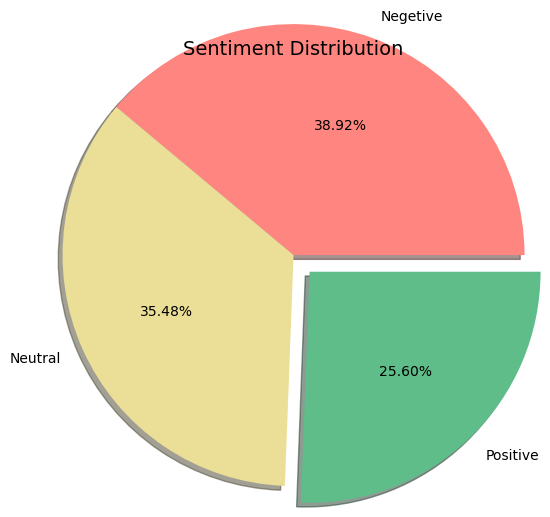


Description Sentiment Summary:
description_predicted_sentiment
Negative    15200
Positive    13645
Neutral     10840
Name: count, dtype: int64


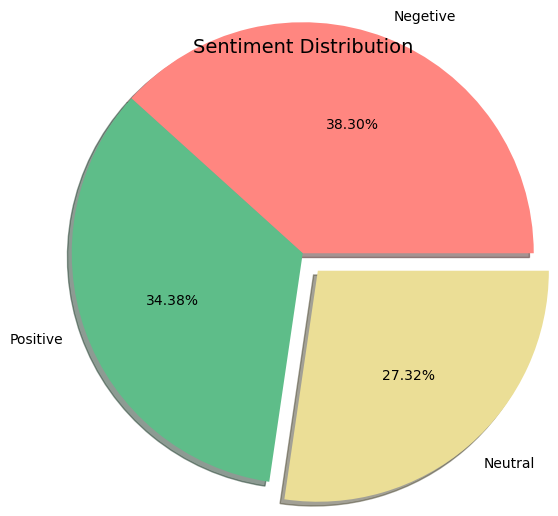

In [39]:
# Count the sentiment distribution for title sentiment
title_sentiment_summary = df['title_predicted_sentiment'].value_counts()

# Display the summaries
print("Title Sentiment Summary:")
print(title_sentiment_summary)
plt.figure(figsize=(10, 5))
colors = ['#FF8680','#EBDE96', '#5EBD89']
plt.pie(df['title_predicted_sentiment'].value_counts(), labels=['Negetive','Neutral','Positive'], shadow=True,
        explode=[0, 0, 0.15], autopct='%1.2f%%', radius=1.5, colors=colors)
plt.title('Sentiment Distribution', fontsize=14)
plt.show()

# Count the sentiment distribution for description sentiment
description_sentiment_summary = df['description_predicted_sentiment'].value_counts()

print("\nDescription Sentiment Summary:")
print(description_sentiment_summary)
plt.figure(figsize=(10, 5))
colors = ['#FF8680', '#5EBD89','#EBDE96']
plt.pie(df['description_predicted_sentiment'].value_counts(), labels=['Negetive','Positive','Neutral'], shadow=True,
        explode=[0, 0, 0.15], autopct='%1.2f%%', radius=1.5, colors=colors)
plt.title('Sentiment Distribution', fontsize=14)
plt.show()

# Logistic Regression:

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report

X = df_preprocessing['descr_lemma']
Y = df['description_predicted_sentiment']

# tfidf = TfidfVectorizer()

vectorizer = HashingVectorizer()
X_vectorized = vectorizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Detailed performance report
print(classification_report(Y_test, Y_pred))

Logistic Regression Accuracy: 0.8248708580068036
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85      3057
     Neutral       0.75      0.83      0.79      2167
    Positive       0.85      0.80      0.83      2713

    accuracy                           0.82      7937
   macro avg       0.82      0.82      0.82      7937
weighted avg       0.83      0.82      0.83      7937



In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report

X = df_preprocessing['title_lemma']
Y = df['title_predicted_sentiment']

#tfidf = TfidfVectorizer()
vectorizer = HashingVectorizer(n_features=20000)
X_vectorized = vectorizer.transform(df_preprocessing['title_lemma'])

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

print(classification_report(Y_test, Y_pred))

Logistic Regression Accuracy: 0.8273907017764899
              precision    recall  f1-score   support

    Negative       0.88      0.83      0.85      3055
     Neutral       0.76      0.90      0.83      2890
    Positive       0.87      0.71      0.79      1992

    accuracy                           0.83      7937
   macro avg       0.84      0.82      0.82      7937
weighted avg       0.83      0.83      0.83      7937



In [45]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

hashing_vectorizer_config = {'n_features': 20000}

# Save the configuration to a file
joblib.dump(hashing_vectorizer_config, 'hashing_vectorizer_config.pkl')

['hashing_vectorizer_config.pkl']

# Naive Baye's
## (To check and observe the different models behaviour on the same dataset)

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer()
X_vectorized = tfidf.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42) 

model = MultinomialNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(f"Naive Baye's Accuracy: {accuracy_score(Y_test,Y_pred)}")

Naive Baye's Accuracy: 0.7502834824240897


# Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(Y_test, Y_pred_svm)}")

SVM Accuracy: 0.8299105455461762
